In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [3]:
# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dropout(rate = 0.9))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(rate = 0.9))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [4]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [ ]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('image_data/training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('image_data/training',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

history=classifier.fit_generator(training_set,
                         steps_per_epoch =18,
                         epochs = 100,
                         validation_data = test_set,
                         validation_steps = 18)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
18/18 [==============================] - 342s 19s/step - loss: 0.7292 - accuracy: 0.4896 - val_loss: 0.6935 - val_accuracy: 0.4583
Epoch 2/100
18/18 [==============================] - 258s 14s/step - loss: 0.6943 - accuracy: 0.5125 - val_loss: 0.6920 - val_accuracy: 0.5174
Epoch 3/100
18/18 [==============================] - 261s 14s/step - loss: 0.6949 - accuracy: 0.4965 - val_loss: 0.6916 - val_accuracy: 0.6910
Epoch 4/100
18/18 [==============================] - 261s 14s/step - loss: 0.6930 - accuracy: 0.5174 - val_loss: 0.6915 - val_accuracy: 0.7031
Epoch 5/100
18/18 [==============================] - 260s 14s/step - loss: 0.6948 - accuracy: 0.4861 - val_loss: 0.6914 - val_accuracy: 0.5052
Epoch 6/100
18/18 [==============================] - 258s 14s/step - loss: 0.6956 - accuracy: 0.4929 - val_loss: 0.6909 - val

In [ ]:
#Summarising the Results
import numpy as np

a=list(history.history['accuracy'])
b=list(history.history['val_accuracy'])

max_train=100*np.round(max(a),4)
max_validation=100*np.round(max(b),4)

#Finding max of Training accuracy
print("Maximum Training Accuracy is",max_train)

#Finding max  validation accuracy
print("Maximum Validtion Accuracy is",max_validation)

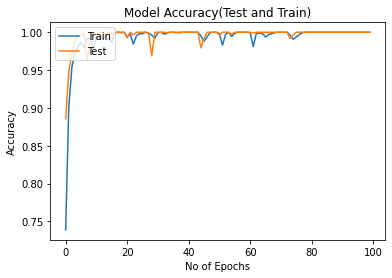

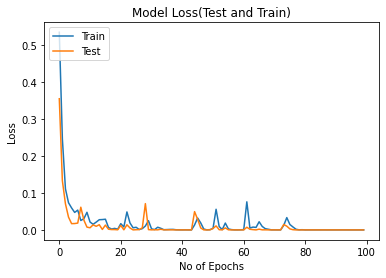

In [7]:
#Plotting Test vs Train Accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy(Test and Train)')
plt.ylabel('Accuracy')
plt.xlabel('No of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Plotting Test vs Train Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss(Test and Train)')
plt.ylabel('Loss')
plt.xlabel('No of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [8]:
# Part 3 - Making new predictions
# Testing
import numpy as np
from keras.preprocessing import image

#First learn the classification indices.
print(training_set.class_indices)

{'Kinnow': 0, 'Orange': 1}


Populating the interactive namespace from numpy and matplotlib


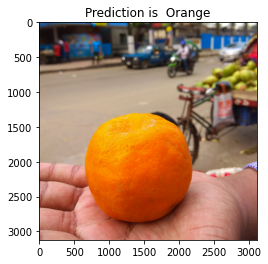

In [9]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('image_data/test/IMG_20190405_161202 - Copy - Copy - Copy - Copy (2).jpg')
imgplot = plt.imshow(img)

test_image = image.load_img('image_data/test/IMG_20190405_161202 - Copy - Copy - Copy - Copy (2).jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

if result[0][0] == 1:
    prediction = 'Orange'
else:
    prediction = 'Kinnow'
    
#print("AI's prediction is: "+ prediction)

plt=plt.title('Prediction is  '+ prediction )

Populating the interactive namespace from numpy and matplotlib


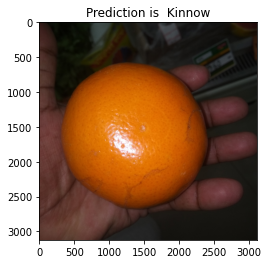

In [12]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('image_data/test/IMG_20190406_212559 - Copy (11) - Copy.jpg')
imgplot = plt.imshow(img)

test_image = image.load_img('image_data/test/IMG_20190406_212559 - Copy (11) - Copy.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

if result[0][0] == 1:
    prediction = 'Orange'
else:
    prediction = 'Kinnow'
    
#print("AI's prediction is: "+ prediction)

plt=plt.title('Prediction is  '+ prediction )